In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import xgboost as xgb

data = pd.read_excel('Telco_Cust_Churn.xls')

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
data = data.replace(' ', value=0)
data.TotalCharges = pd.to_numeric(data.TotalCharges)
data.TotalCharges.dtype

dtype('float64')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


/Users/laraturunc/Desktop/churnPredictionProject/churn2_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/laraturunc/Desktop/churnPredictionProject/churn2_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/laraturunc/Desktop/churnPredictionProject/churn2_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


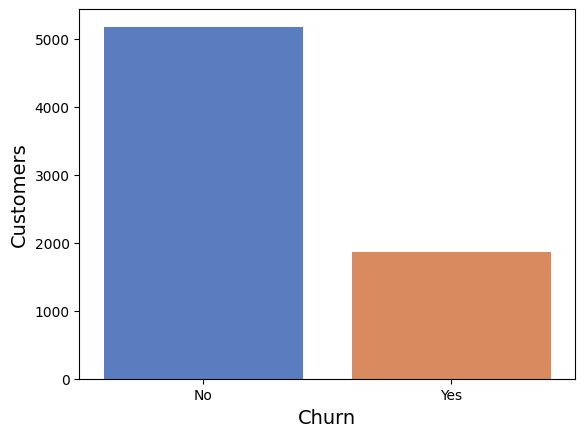

In [4]:
g = sns.countplot(x="Churn",data=data, palette="muted")
g.set_ylabel("Customers", fontsize=14)
g.set_xlabel("Churn", fontsize=14)

data.Churn.value_counts(normalize=True)

data = data.drop('customerID', axis = 1)


catagorical = [i for i in data.columns if data[i].dtypes == 'object']

for i in catagorical:   
    print(i, ':', data[i].unique())

data = data.replace(regex=r'No\s[a-z]+\sservice', value='No')

for i in catagorical:   
    if len(data[i].unique()) == 2:        
        data[i] = data[i].map({'Male': 0, 'Female': 1, 'No': 0, 'Yes': 1})

catagorical = [i for i in data.columns if data[i].dtypes == 'object']

for i in catagorical:   
    print(i, ':', data[i].unique())

data = data.replace(regex=r'\s\(automatic\)', value='')

/Users/laraturunc/Desktop/churnPredictionProject/churn2_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/laraturunc/Desktop/churnPredictionProject/churn2_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/laraturunc/Desktop/churnPredictionProject/churn2_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/laraturunc/Desktop/churnPredictionProject/churn2_env/lib/python3.9/site-packages/seaborn/_

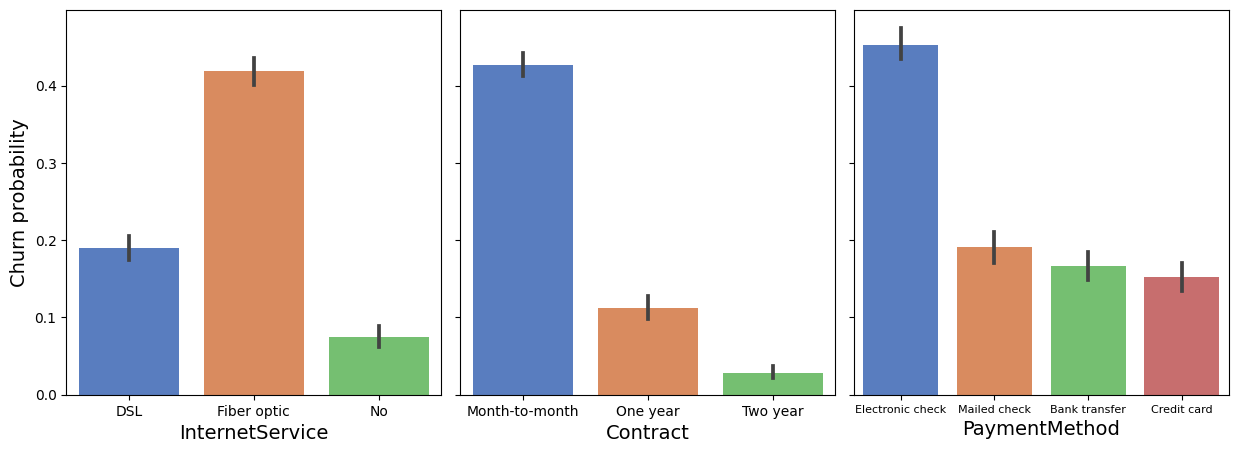

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.05)

g1 = sns.barplot(ax=axes[0], x="InternetService",y="Churn",data=data, palette="muted")
g1.set_xlabel("InternetService", fontsize=14)
g1.set_ylabel("Churn probability", fontsize=14)

g2 = sns.barplot(ax=axes[1], x="Contract",y="Churn",data=data, palette="muted")
g2.set_xlabel("Contract", fontsize=14)
g2.set_ylabel('')

g3 = sns.barplot(ax=axes[2], x="PaymentMethod",y="Churn",data=data, palette="muted")
g3.set_xlabel("PaymentMethod", fontsize=14)
g3.set_ylabel('')
g3.set_xticklabels(labels=data.PaymentMethod.unique(), fontsize=8)

internetservice_keys = data.InternetService.unique()
internetservice_mapping = dict(zip(internetservice_keys, [1, 2, 0]))
data.InternetService = data.InternetService.map(internetservice_mapping)

contract_keys = data.Contract.unique()
contract_mapping = dict(zip(contract_keys, [2, 1, 0]))
data.Contract = data.Contract.map(contract_mapping)

In [6]:
numeric_data = data.select_dtypes(include='number')

In [9]:
data = pd.get_dummies(data)
data.head()

y = data.Churn.values

x = data.drop('Churn', axis = 1).values

x = MinMaxScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=51)

x_smote, y_smote = SMOTE().fit_resample(x, y)

x_nearmiss, y_nearmiss = NearMiss(version=3).fit_resample(x, y)

classifiers = []
classifiers.append(LogisticRegression(max_iter=500))
classifiers.append(RandomForestClassifier())
classifiers.append(AdaBoostClassifier())
classifiers.append(xgb.XGBClassifier())
classifiers.append(SVC(C = 10))

def cross_validate(classifiers, x_train, y_train, x_test, y_test):
    cv_results = []
    for classifier in classifiers:
        cv_results.append((cross_val_score(classifier, x_train, y_train,\
                                           scoring = "f1_weighted")).mean())
    best_clf = classifiers[np.argmax(cv_results)]
    return best_clf

best_clf_wo_balancing = cross_validate(classifiers, x_train, y_train, x_test, y_test)
best_clf_smote = cross_validate(classifiers, x_smote, y_smote, x_test, y_test)
best_clf_nearmiss = cross_validate(classifiers, x_nearmiss, y_nearmiss, x_test, y_test)

def print_best_clf_results(best_clf, x_train, y_train, x_test, y_test):
    
    print(f'\nThe classifier with the best f1 result is: {best_clf}')
    
    best_clf.fit(x_train, y_train)
    y_pred = best_clf.predict(x_test)
    
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))
    print('\n\n')
    f_i = best_clf.feature_importances_
    return f_i

print('-'*70)
print('Without balancing:')
print('-'*70)
f_i = print_best_clf_results(best_clf_wo_balancing, x_train, y_train, x_test, y_test)

print('-'*70)
print('Over-sampling using SMOTE technique:')
print('-'*70)
f_i_smote = print_best_clf_results(best_clf_smote, x_smote, y_smote, x_test, y_test)

print('-'*70)
print('Under-sampling using NearMiss3 technique:')
print('-'*70)
f_i_nearmiss = print_best_clf_results(best_clf_nearmiss, x_nearmiss, y_nearmiss, x_test, y_test)

col_names = data.columns.drop('Churn')

feature_importances = pd.DataFrame({'Feature': col_names, 'Feature Importances': f_i_smote})
feature_importances = feature_importances.sort_values('Feature Importances', ascending=False, ignore_index=True).head()

#aligning text to the left:
feature_importances = feature_importances.style.set_properties(**{'text-align': 'left'})
feature_importances = feature_importances.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
feature_importances


----------------------------------------------------------------------
Without balancing:
----------------------------------------------------------------------

The classifier with the best f1 result is: AdaBoostClassifier()

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1300
           1       0.65      0.52      0.58       461

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761




----------------------------------------------------------------------
Over-sampling using SMOTE technique:
----------------------------------------------------------------------

The classifier with the best f1 result is: RandomForestClassifier()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1300
           1       1.00      1.00      

,Feature,Feature Importances
0,TotalCharges,0.144376
1,tenure,0.143618
2,MonthlyCharges,0.138988
3,Contract,0.134971
4,InternetService,0.089288
